# Demonstration of various configurations of the universe

Chosen method: <b><i> Method 2</i></b>

Imports and variables:

In [434]:
import numpy as np
import matplotlib.pyplot as plt

TAU = np.pi*2
chords_to_draw = 100

# size of the 'universe'
r = 100

Define necessary methods:

In [435]:
# Returns Boolean
def intersects(line,circles):
    x1,x2 = line[0][0], line[1][0]
    y1,y2 = line[0][1], line[1][1]
    
    for circle in circles:
        center = circle.center
        radius = circle.radius

        gradient = (y2-y1)/(x2-x1)
        intercept = y2-(gradient*x2)
        
        # equation for closest approach to a point (circle center) given a line equation
        distance = (np.abs(gradient*center[0] - center[1] + intercept))/(np.sqrt(gradient**2 + 1))
        
        if distance <= radius:
            # first time it detects an intersect, exit the loop as the chord is invalid
            return True
    
    # if no intersect is detected
    return False

In [436]:
# Returns Boolean
def draw_chord(p1,p2,c1,thickness):
    x1,x2 = p1[0], p2[0]
    y1,y2 = p1[1], p2[1]

    if intersects((p1,p2), c1):
        plt.plot([x1,x2],[y1,y2],'red',linewidth=thickness)
        return True
    else:
        plt.plot([x1,x2],[y1,y2],'green',linewidth=thickness)
        return False

In [437]:
# Return pair of floats

def get_coords(r,theta):
    return r * np.cos(theta), r * np.sin(theta)

def get_chord(x,y,r,angle):
    chord_length = np.sqrt(r**2 - (np.sqrt(x**2 + y**2))**2)
    p1 = x + chord_length * np.cos(angle), y + chord_length * np.sin(angle)
    p2 = x - chord_length * np.cos(angle), y - chord_length * np.sin(angle)

    return p1,p2

Generate random chords:

In [438]:
def generate_chords(chords_to_draw):
    chords = []

    for i in range(chords_to_draw):
        # generate random radius angle
        angle = np.random.uniform() * TAU
        x, y = get_coords(r,angle)

        # subtract 90 degrees (pi/2) to get perpendicular
        angle_perp = angle - np.pi/2
        x_perp, y_perp = get_coords(r, angle_perp)

        # choose a random radius length
        r_length = np.random.uniform() * r
        x, y = get_coords(r_length, angle)
        midpoint = (x,y)

        # generates chord perpendicular to end of partial radius
        p1, p2 = get_chord(x,y,r,angle_perp)

        chords.append((p1,p2))
    return chords

Define body/bodies within universe:

In [439]:
universe = plt.Circle((0,0), r, color='black', fill=False)

bodies = []
body_data = [((0,35),10), 
             ((0,-35),10)]

for d in body_data:
    bodies.append(plt.Circle(d[0],d[1],color='blue',fill=False))

Plot:

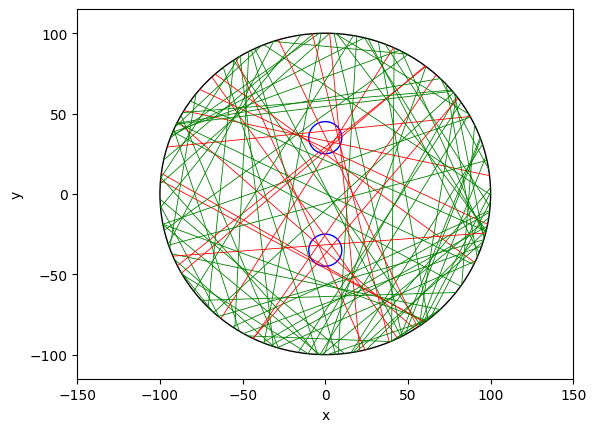

In [440]:
fig, ax = plt.subplots()
#ax.grid()
ax.set_xlabel('x'), ax.set_ylabel('y')
ax.set_xlim((-r - 0.5*r, r + 0.5*r)), ax.set_ylim((-r - 0.15*r, r + 0.15*r))
ax.add_artist(universe)
for body in bodies:
    ax.add_artist(body)

results = []

total = chords_to_draw
chords = generate_chords(chords_to_draw)

for i in range(len(chords)):
    if draw_chord(chords[i][0],chords[i][1],bodies,0.6):
        total -= 1

In [441]:
valid = str(total)
invalid = str(chords_to_draw-total)

print(valid + " valid chords\n" + invalid + " invalid chords\n")

s = str(np.log(total))
s_normalised = str(np.log(total/chords_to_draw))

print(s + " is the entropy without normalisation\n" + s_normalised + " is the entropy with normalisation")

82 valid chords
18 invalid chords

4.406719247264253 is the entropy without normalisation
-0.19845093872383832 is the entropy with normalisation


In [442]:
results = []

for i in range(100):
    bodies = []
    body_data = [((0,0.4*i),10), 
                 ((0,-0.4*i),10)]

    for d in body_data:
        bodies.append(plt.Circle(d[0],d[1],color='blue',fill=False))

    total = 1000
    chords = generate_chords(1000)

    for i in range(len(chords)):
        if intersects((chords[i][0],chords[i][1]),bodies):
            total -= 1

    valid = total
    invalid = 1000-total

    results.append((valid,invalid,np.log(valid),round(bodies[0].center[1],2) - round(bodies[1].center[1],2)))

entropy_distance_data = []
for val in results:
    entropy_distance_data.append((val[2],val[3]))

entropy_distance_data

[(6.803505257608338, 0.0),
 (6.790097235513905, 0.8),
 (6.794586580876499, 1.6),
 (6.799055862058796, 2.4),
 (6.796823718274855, 3.2),
 (6.771935555839602, 4.0),
 (6.796823718274855, 4.8),
 (6.775366090936392, 5.6),
 (6.774223886357614, 6.4),
 (6.78897174299217, 7.2),
 (6.760414691083428, 8.0),
 (6.762729506931879, 8.8),
 (6.777646593635117, 9.6),
 (6.744059186311348, 10.4),
 (6.78897174299217, 11.2),
 (6.759255270663693, 12.0),
 (6.726233402358747, 12.8),
 (6.752270376141742, 13.6),
 (6.7357800142423265, 14.4),
 (6.741700694652055, 15.2),
 (6.739336627357174, 16.0),
 (6.734591659972948, 16.8),
 (6.7464121285733745, 17.6),
 (6.732210706467206, 18.4),
 (6.731018100482083, 19.2),
 (6.729824070489475, 20.0),
 (6.71295620067707, 20.8),
 (6.7357800142423265, 21.6),
 (6.71901315438526, 22.4),
 (6.731018100482083, 23.2),
 (6.71295620067707, 24.0),
 (6.7226297948554485, 24.8),
 (6.703188113240863, 25.6),
 (6.739336627357174, 26.4),
 (6.716594773520978, 27.2),
 (6.71295620067707, 28.0),
 (6.726